<h1>Simulation der Tangentensteigung für ein Polynom 3. Grades</h1>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from scipy.misc import derivative
%matplotlib

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


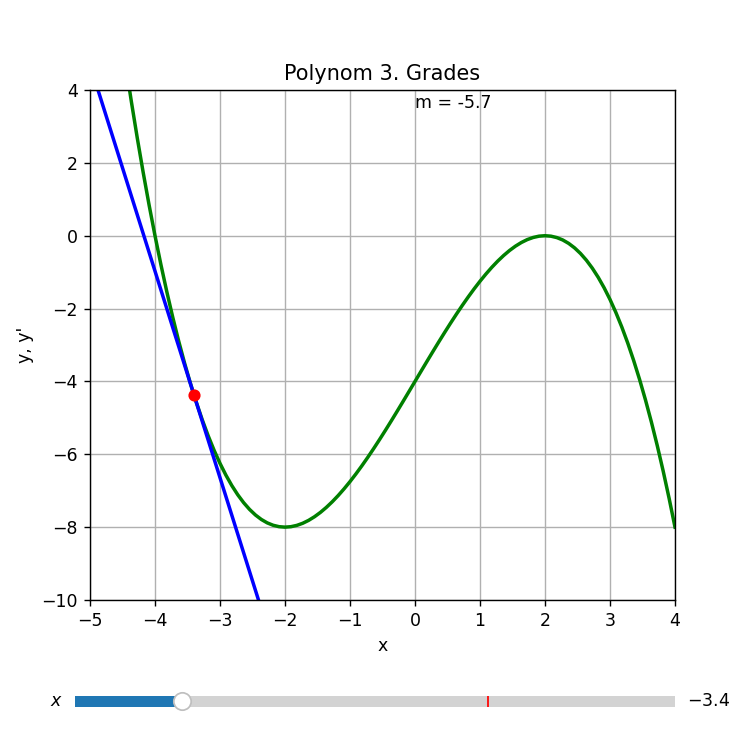

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.subplots_adjust(left=0.12, bottom=0.2)
plt.title("Polynom 3. Grades")
plt.xlabel("x")
plt.ylabel("y, y'")
x1, x2 = -5, 4
y1, y2 = -10, 4
plt.xlim(x1, x2)
plt.ylim(y1, y2)
txtM = ax.text(0, y2 - 0.5, 'm=0')


# Polynom
def f(x):
    y = -x ** 3 / 4 + 3 * x - 4
    return y


# Tangentengleichung
def tangente(x, x0):
    m = derivative(f, x0, dx=1e-3)
    return m * (x - x0) + f(x0)


x = np.linspace(x1, x2, 100)
y1, y2 = plt.plot(x, f(x), x, tangente(x, 2))
plt.setp(y1, color='g', linewidth=2.0)
plt.setp(y2, color='b', linewidth=2.0)
y3, = plt.plot(2, f(2), "or")
# x-, y-Position, Laenge, Hoehe
xyA = plt.axes([0.1, 0.05, 0.8, 0.03])
# Slider-Objekte erzeugen
sldA = Slider(xyA, r'$x$', x1, x2, valinit=1.2, valstep=0.1)


def update(val):
    xi = sldA.val
    m = derivative(f, xi, dx=1e-3)
    y1.set_data(x, f(x))  # Funktionsgraph
    y2.set_data(x, tangente(x, xi))  # Tangente
    y3.set_data(xi, f(xi))  # Berührungspunkt der Tangente
    txtM.set_text(f'm = {m:2.1f}')


sldA.on_changed(update)
ax.grid(True)
plt.show()